In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.drop(['Name','Ticket','PassengerId','Cabin'],axis = 1,inplace = True)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# handling outlier

<AxesSubplot:>

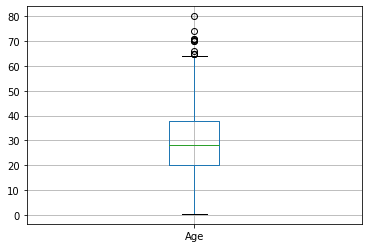

In [7]:
data.boxplot('Age')

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

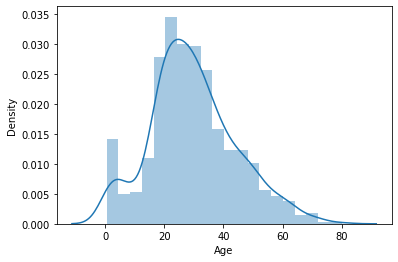

In [8]:
sns.distplot(data['Age'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

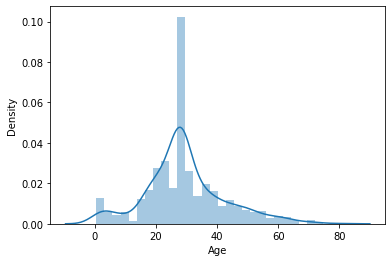

In [12]:
sns.distplot(data['Age'])

# by assuming and by observing the "Age" parameter it is a guassian distribution--------so we need to only calculate upper and lower boundary

In [13]:
upper_boundary = data['Age'].mean() + 3*data['Age'].std()
lower_boundary = data['Age'].mean() - 3*data['Age'].std()
print(upper_boundary)
print(lower_boundary)

68.42067214450209
-9.697507161337114


In [14]:
data.loc[data['Age']>69,'Age']=73

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

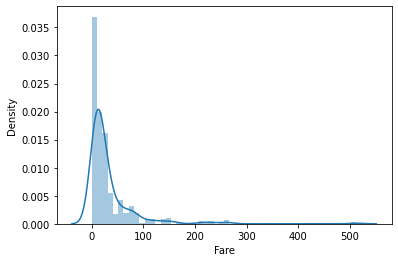

In [15]:
sns.distplot(data['Fare'])

# observation -> it is right skew distrubution and it has so many outlier

In [16]:
iqr = data['Fare'].quantile(0.75)-data['Fare'].quantile(0.25)
iqr

23.0896

In [17]:
upper_bridge = data['Fare'].quantile(0.75)+(iqr*3)
lower_bridge = data['Fare'].quantile(0.25)-(iqr*1.5)
print(upper_bridge)
print(lower_bridge)

100.2688
-26.724


In [18]:
data.loc[data['Fare']>100,'Fare']=100

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

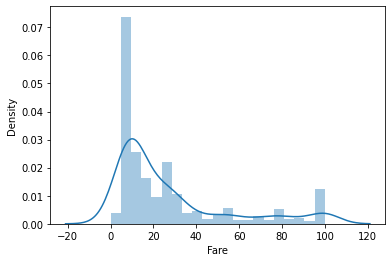

In [19]:
sns.distplot(data['Fare'])

In [20]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.366633,0.523008,0.381594,27.027169
std,0.486592,0.836071,13.033087,1.102743,0.806057,27.296632
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,73.000000,8.000000,6.000000,100.000000


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

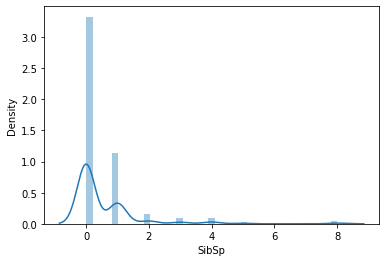

In [21]:
sns.distplot(data['SibSp'])

In [22]:
iqr = data['SibSp'].quantile(0.75)- data['SibSp'].quantile(0.25)
print(iqr)

1.0


In [23]:
upper_bridge = data['SibSp'].quantile(0.75)+(3*iqr)
lower_bridge = data['SibSp'].quantile(0.25)-(1.5*iqr)
print(lower_bridge)

-1.5


In [24]:
data.loc[data['SibSp']>4,'SibSp']=4

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

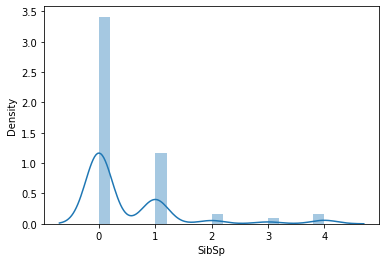

In [25]:
sns.distplot(data['SibSp'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

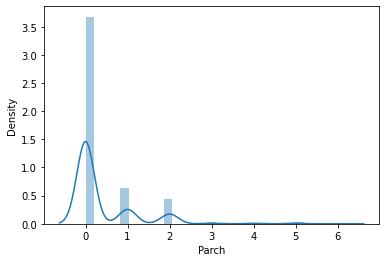

In [26]:
sns.distplot(data['Parch'])

In [27]:
iqr = data['Parch'].quantile(0.8)-data['Parch'].quantile(0.2)
print(iqr)

1.0


In [28]:
upper_bridge = data['Parch'].quantile(0.75)+3
print(upper_bridge)

3.0


In [29]:
data.loc[data['Parch']>3,'Parch']=3

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

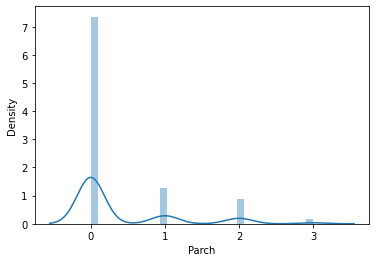

In [30]:
sns.distplot(data['Parch'])

In [31]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.366633,0.485971,0.362514,27.027169
std,0.486592,0.836071,13.033087,0.908496,0.715721,27.296632
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,73.000000,4.000000,3.000000,100.000000


  we have removed most of the outlier value from our data so out next step is to creating new feature


In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
#data.info()

# Creating new feature 

In [34]:
data.loc[data['Age']<18,'New_Age_Cat']='young'
data.loc[(data['Age']>=18) & (data['Age']<50),'New_Age_Cat']='adult'
data.loc[(data['Age']>=50),'New_Age_Cat']='senior'

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Age_Cat
0,0,3,male,22.0,1,0,7.2500,S,adult
1,1,1,female,38.0,1,0,71.2833,C,adult
2,1,3,female,26.0,0,0,7.9250,S,adult
3,1,1,female,35.0,1,0,53.1000,S,adult
4,0,3,male,35.0,0,0,8.0500,S,adult


In [36]:
data.loc[(data['Age']<18) & (data['Sex']== 'male'),'cat_male']= 'young_male'
data.loc[((data['Age']>=18) & (data['Age']<50)) & (data['Sex']== 'male'),'cat_male']= 'adult_male'
data.loc[(data['Age']>=50) & (data['Sex']== 'male'),'cat_male']= 'senior_male'
# same thing for female
data.loc[(data['Age']<18) & (data['Sex']== 'female'),'cat_male']= 'young_female'
data.loc[((data['Age']>=18) & (data['Age']<50)) & (data['Sex']== 'female'),'cat_male']= 'adult_female'
data.loc[(data['Age']>=50) & (data['Sex']== 'female'),'cat_male']= 'senior_female'


In [37]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Age_Cat,cat_male
0,0,3,male,22.0,1,0,7.2500,S,adult,adult_male
1,1,1,female,38.0,1,0,71.2833,C,adult,adult_female
2,1,3,female,26.0,0,0,7.9250,S,adult,adult_female
3,1,1,female,35.0,1,0,53.1000,S,adult,adult_female
4,0,3,male,35.0,0,0,8.0500,S,adult,adult_male


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   New_Age_Cat  891 non-null    object 
 9   cat_male     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [39]:
# Is alone
data.loc[(data['SibSp'] + data['Parch'] > 0),'is_alone'] ='not_alone'
data.loc[(data['SibSp'] + data['Parch'] == 0),'is_alone'] ='alone'

In [40]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Age_Cat,cat_male,is_alone
0,0,3,male,22.0,1,0,7.2500,S,adult,adult_male,not_alone
1,1,1,female,38.0,1,0,71.2833,C,adult,adult_female,not_alone
2,1,3,female,26.0,0,0,7.9250,S,adult,adult_female,alone
3,1,1,female,35.0,1,0,53.1000,S,adult,adult_female,not_alone
4,0,3,male,35.0,0,0,8.0500,S,adult,adult_male,alone


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   New_Age_Cat  891 non-null    object 
 9   cat_male     891 non-null    object 
 10  is_alone     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


<AxesSubplot:xlabel='New_Age_Cat', ylabel='Survived'>

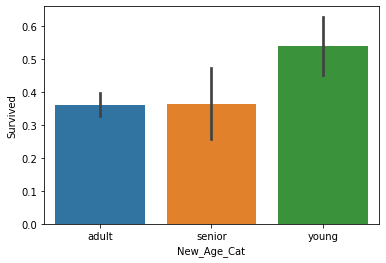

In [42]:
sns.barplot(x = 'New_Age_Cat', y = 'Survived', data = data)


<AxesSubplot:xlabel='Fare', ylabel='count'>

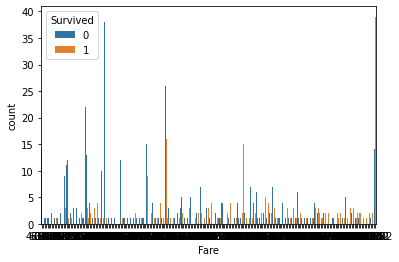

In [43]:
sns.countplot(x='Fare',hue='Survived',data = data)

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

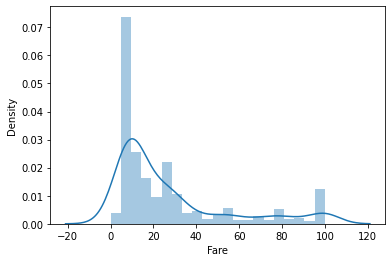

In [44]:
# who have greater fare those are survived
sns.distplot(data['Fare'])

In [45]:
data.loc[(data['Fare']<40),'new_fare']='low'
data.loc[(data['Fare']>=40) & (data['Fare']<80),'new_fare']='medium'
data.loc[(data['Fare']>=80),'new_fare']='high'

In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Age_Cat,cat_male,is_alone,new_fare
0,0,3,male,22.0,1,0,7.2500,S,adult,adult_male,not_alone,low
1,1,1,female,38.0,1,0,71.2833,C,adult,adult_female,not_alone,medium
2,1,3,female,26.0,0,0,7.9250,S,adult,adult_female,alone,low
3,1,1,female,35.0,1,0,53.1000,S,adult,adult_female,not_alone,medium
4,0,3,male,35.0,0,0,8.0500,S,adult,adult_male,alone,low


<AxesSubplot:xlabel='new_fare', ylabel='Survived'>

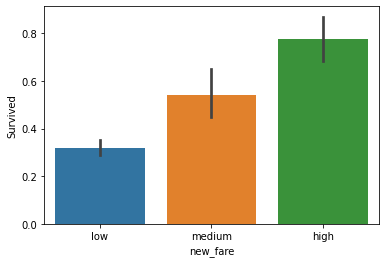

In [47]:
sns.barplot(x='new_fare',y = 'Survived',data = data)

# converting categorical feature into numerical feature

In [48]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Age_Cat,cat_male,is_alone,new_fare
0,0,3,male,22.0,1,0,7.2500,S,adult,adult_male,not_alone,low
1,1,1,female,38.0,1,0,71.2833,C,adult,adult_female,not_alone,medium
2,1,3,female,26.0,0,0,7.9250,S,adult,adult_female,alone,low
3,1,1,female,35.0,1,0,53.1000,S,adult,adult_female,not_alone,medium
4,0,3,male,35.0,0,0,8.0500,S,adult,adult_male,alone,low


In [49]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)
New_Age_Cat = pd.get_dummies(data['New_Age_Cat'],drop_first=True)
cat_male = pd.get_dummies(data['cat_male'],drop_first=True)
is_alone = pd.get_dummies(data['is_alone'],drop_first=True)
new_fare = pd.get_dummies(data['new_fare'],drop_first=True)




In [50]:
data = pd.concat([data,Sex,Embarked,New_Age_Cat,cat_male,is_alone,new_fare],axis =1)

In [51]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Age_Cat,cat_male,...,senior,young,adult_male,senior_female,senior_male,young_female,young_male,not_alone,low,medium
0,0,3,male,22.0,1,0,7.2500,S,adult,adult_male,...,0,0,1,0,0,0,0,1,1,0
1,1,1,female,38.0,1,0,71.2833,C,adult,adult_female,...,0,0,0,0,0,0,0,1,0,1
2,1,3,female,26.0,0,0,7.9250,S,adult,adult_female,...,0,0,0,0,0,0,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,adult,adult_female,...,0,0,0,0,0,0,0,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,adult,adult_male,...,0,0,1,0,0,0,0,0,1,0


In [52]:
data.drop(['Sex','Age','Fare','Embarked','New_Age_Cat','cat_male','is_alone','new_fare'],axis =1 ,inplace = True)

In [53]:
data.head()

,Survived,Pclass,SibSp,Parch,male,Q,S,senior,young,adult_male,senior_female,senior_male,young_female,young_male,not_alone,low,medium
0,0,3,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [54]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data,test_size=.2,random_state=42)

In [55]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Survived       712 non-null    int64
 1   Pclass         712 non-null    int64
 2   SibSp          712 non-null    int64
 3   Parch          712 non-null    int64
 4   male           712 non-null    uint8
 5   Q              712 non-null    uint8
 6   S              712 non-null    uint8
 7   senior         712 non-null    uint8
 8   young          712 non-null    uint8
 9   adult_male     712 non-null    uint8
 10  senior_female  712 non-null    uint8
 11  senior_male    712 non-null    uint8
 12  young_female   712 non-null    uint8
 13  young_male     712 non-null    uint8
 14  not_alone      712 non-null    uint8
 15  low            712 non-null    uint8
 16  medium         712 non-null    uint8
dtypes: int64(4), uint8(13)
memory usage: 36.9 KB


In [56]:
x = train_set.drop(['Survived'],axis =1)
y = train_set['Survived']
xt = test_set.drop(['Survived'],axis =1)
yt = test_set['Survived']

#   model building

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
#model = xgboost.XGBClassifier()
#model = LogisticRegression()
model = RandomForestClassifier()
model.fit(x,y)
y_pred = model.predict(xt)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(yt,y_pred))
print(classification_report(yt,y_pred))

[[96  9]
 [21 53]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Hyperparameter tunning

In [59]:
# 1st randomsearchcv 2nd gridsearch

In [60]:
RandomForestClassifier()

RandomForestClassifier()

In [61]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start = 200,stop=2000,num=10)]
criterion=["gini", "entropy"]
max_depth=[int(x) for x in np.linspace(100,1200,10)]
min_samples_split=[1,3,5,7,9,11,13]
min_samples_leaf=[3,7,9,11,13,15]

In [62]:
random_params = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
}

In [63]:
random_params

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'criterion': ['gini', 'entropy'],
 'max_depth': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200],
 'min_samples_split': [1, 3, 5, 7, 9, 11, 13],
 'min_samples_leaf': [3, 7, 9, 11, 13, 15]}

In [64]:
rd_search = RandomizedSearchCV(model,param_distributions=random_params,n_iter=100,cv =10,verbose=2,n_jobs=-1,random_state=42)
rd_search.fit(x,y)
rd_pred = rd_search.predict(xt)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Python39\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Python39\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._di

In [65]:
print(confusion_matrix(yt,rd_pred))
print(classification_report(yt,rd_pred))

[[93 12]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [66]:
rd_search.best_estimator_

RandomForestClassifier(max_depth=1200, min_samples_leaf=13, min_samples_split=3,
                       n_estimators=400)

In [67]:
rd_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 3,
 'min_samples_leaf': 13,
 'max_depth': 1200,
 'criterion': 'gini'}

from sklearn.model_selection import GridSearchCV

grid_params ={
    'n_estimators':[rd_search.best_params_['n_estimators'],
                    rd_search.best_params_['n_estimators']+25,
                    rd_search.best_params_['n_estimators']+50,
                    rd_search.best_params_['n_estimators']-50,
                    rd_search.best_params_['n_estimators']-25,
                   ],
    'min_samples_split':[rd_search.best_params_['min_samples_split'],
                         rd_search.best_params_['min_samples_split']+1,
                         rd_search.best_params_['min_samples_split']-1,
                         rd_search.best_params_['min_samples_split']-2,
                         rd_search.best_params_['min_samples_split']+2,
                        ],
    'min_samples_leaf':[rd_search.best_params_['min_samples_leaf'],
                         rd_search.best_params_['min_samples_leaf']+1,
                         rd_search.best_params_['min_samples_leaf']-1,
                        rd_search.best_params_['min_samples_leaf']-2,
                        rd_search.best_params_['min_samples_leaf']+2,
                        ],
    
     'criterion': [rd_search.best_params_['criterion']],
    'max_depth':[rd_search.best_params_['max_depth'],
                 rd_search.best_params_['max_depth']+50,
                rd_search.best_params_['max_depth']-25,
                 rd_search.best_params_['max_depth']-50,
                 rd_search.best_params_['max_depth']+25,
                
                
                ]
    
    
}

In [68]:
#grid_search = GridSearchCV(model,param_grid=grid_params,cv=10,verbose=2,n_jobs=-1,)

In [69]:
#grid_search.fit(x,y)
#grid_search.best_params_

In [70]:
#grid_pred = grid_search.predict(xt)

In [71]:
#print(confusion_matrix(yt,grid_pred))
#print(classification_report(yt,grid_pred))

grid_search.best_params_

# finaltest prediction

In [72]:
test_data = pd.read_csv("final_test.csv")

In [73]:
test_data.head()

,Pclass,SibSp,Parch,male,Q,S,senior,young,adult_male,senior_female,senior_male,young_female,young_male,not_alone,low,medium
0,3,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1,3,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
2,2,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0
3,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
4,3,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0


In [74]:
 rd_pred =rd_search.predict(test_data)

In [75]:
sample_sub = pd.read_csv("gender_submission.csv")
dataset = pd.DataFrame({'PassengerId':sample_sub['PassengerId'],'Survived': rd_pred})

In [76]:
dataset.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [77]:
dataset.to_csv('my_submission.csv',index = False)